1.  	Dataset yang digunakan untuk mengklasifikasi gambar apa ?
Jawab : Klasifikasi gambar tingkat kematangan buah pisang, seperti gambar pisang mentah, pisang matang , dan pisang busuk
2.  	Sebutkan jumlah image pada masing – masing kelas ?
Jawab : 240 Image
3.  	Dataset dibagi menjadi berapa Folder dan berapa jumlah masing -  masing ?
Jawab : 80 Image per Folder
4.  	Berapa Batch size yang digunakan ?
Jawab : 62
5.  	Image dataset diubah menjadi ukuran berapa sebelum dilakukan convolution ?
Jawab : 256
6.  	Berapa jumlah iterasi yang digunakan ?
Jawab : 62
7.  	sebutkan augmentasi apa saja yang dilakukan dalam pipeline source code yang anda kerjakan ?
Jawab : resizing,dan rescale
8.  	sebutkam model layer yang digunakan pada tugas anda ?
Jawab : Conv2D dan MaxPooling2D
9.  	optimizer yang digunakan pada tugas anda ?
Jawab : Adam
10.   Berapa total parameter yang digunakan dan parameter yang ditrain ?
Jawab : 5 Parameter
11.   Sebutkan accuracy dan loss pada epoch terakhir ?
Jawab : 0.8870967626571655
12.   Sebutkan accuracy yang tertinggi dan epoch ke berapa ?
Jawab : 1 di epoch 62
13.   Apakah prediksi gambar yang dilakukan sudah benar ?
Jawab : Benar

**Eksperimen**
-        No 1
-        80% train : 10% val : 10% test,  => 0.8870967626571655
-        70% train : 15% val : 15% test, => 0.9137930870056152
-        80% train : 20% val, => 0.8387096524238586
-        70% train : 30% => 0.7419

-        No 2 Augmentasi Data => Flip dan Rotasi(0.8500000238418579)

-        No 3 Batch Size
-           - Batch Size = 40(0.8750)
-           - Batch Size = 80(0.9624999761581421)

In [149]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [150]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [151]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=62
CHANNELS=3

In [152]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/image-classification-pisang/IMAGE CLASSIFICATION PISANG/TRAIN",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 240 files belonging to 3 classes.


In [153]:
class_names = dataset.class_names
class_names

['PISANG BUSUK', 'PISANG MASAK', 'PISANG MENTAH']

In [154]:
len(dataset)

4

In [155]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[ 48.652344  50.652344  45.652344]
  [ 45.9375    47.9375    42.9375  ]
  [ 44.554688  46.554688  41.554688]
  ...
  [ 36.371094  37.371094  29.371094]
  [ 39.11328   41.11328   28.113281]
  [ 34.242188  36.242188  22.867188]]

 [[ 40.92578   42.92578   37.92578 ]
  [ 38.191406  40.191406  37.191406]
  [ 40.058594  42.058594  39.058594]
  ...
  [ 30.        31.        23.      ]
  [ 38.445312  40.445312  27.445312]
  [ 34.085938  36.085938  22.710938]]

 [[ 43.29297   45.29297   40.29297 ]
  [ 36.941406  38.941406  35.941406]
  [ 44.898438  46.898438  43.898438]
  ...
  [ 38.898438  39.898438  31.898438]
  [ 32.523438  34.523438  21.523438]
  [ 33.851562  35.851562  22.476562]]

 ...

 [[ 60.75      74.75      87.75    ]
  [ 64.77734   78.77734   91.77734 ]
  [ 63.183594  79.18359   92.18359 ]
  ...
  [165.96875  144.1211   129.66406 ]
  [169.03125  147.03125  124.03125 ]
  [166.03125  145.66797  118.66797 ]]

 [[ 64.23828   78.23828   91.23828 ]
  [ 61.7

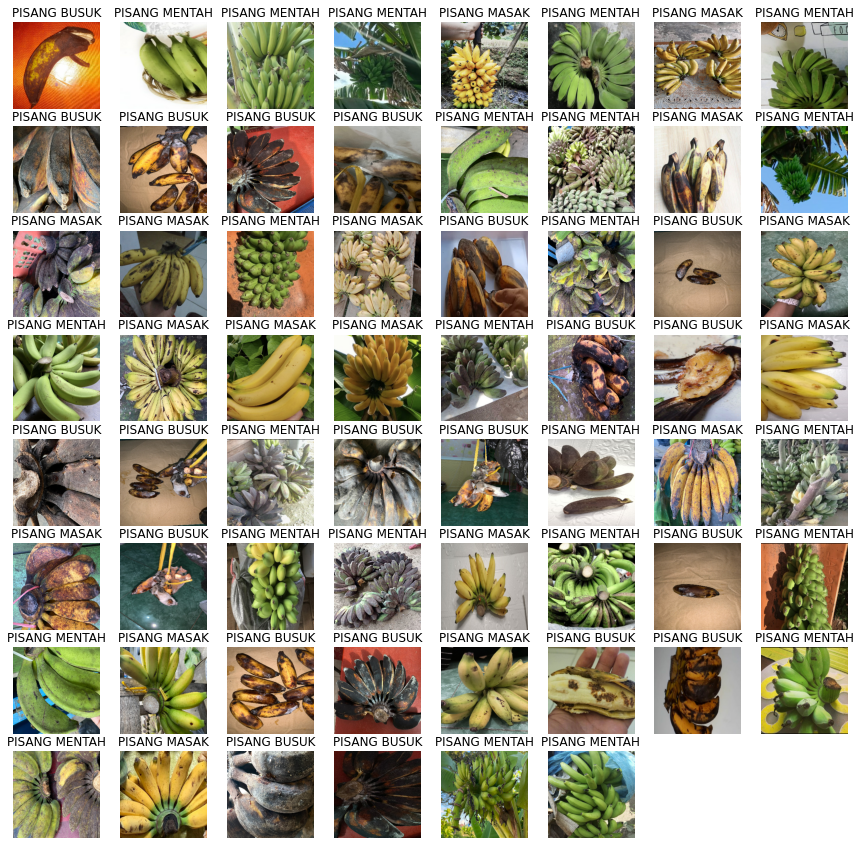

In [156]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [157]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [158]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset) #utama

In [159]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [160]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [161]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    #data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [162]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [163]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_19 (Sequential)   (62, 256, 256, 3)         0         
_________________________________________________________________
conv2d_42 (Conv2D)           (62, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (62, 127, 127, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (62, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (62, 62, 62, 64)          0         
_________________________________________________________________
conv2d_44 (Conv2D)           (62, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (62, 30, 30, 64)        

In [164]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=2,
    epochs=EPOCHS,
)

Epoch 1/62
3/3 - 11s - loss: 2.0802 - accuracy: 0.1742
Epoch 2/62
3/3 - 7s - loss: 1.5948 - accuracy: 0.3708
Epoch 3/62
3/3 - 7s - loss: 1.2609 - accuracy: 0.3652
Epoch 4/62
3/3 - 7s - loss: 1.1327 - accuracy: 0.3989
Epoch 5/62
3/3 - 7s - loss: 1.0905 - accuracy: 0.3820
Epoch 6/62
3/3 - 7s - loss: 1.0915 - accuracy: 0.3315
Epoch 7/62
3/3 - 7s - loss: 1.1065 - accuracy: 0.4101
Epoch 8/62
3/3 - 7s - loss: 1.1074 - accuracy: 0.3933
Epoch 9/62
3/3 - 7s - loss: 1.0441 - accuracy: 0.4494
Epoch 10/62
3/3 - 7s - loss: 1.0424 - accuracy: 0.4607
Epoch 11/62
3/3 - 7s - loss: 1.0393 - accuracy: 0.4719
Epoch 12/62
3/3 - 7s - loss: 1.0225 - accuracy: 0.5112
Epoch 13/62
3/3 - 6s - loss: 0.9893 - accuracy: 0.5506
Epoch 14/62
3/3 - 7s - loss: 0.9859 - accuracy: 0.5393
Epoch 15/62
3/3 - 7s - loss: 0.9329 - accuracy: 0.5730
Epoch 16/62
3/3 - 7s - loss: 0.9122 - accuracy: 0.5899
Epoch 17/62
3/3 - 7s - loss: 0.8991 - accuracy: 0.5674
Epoch 18/62
3/3 - 7s - loss: 0.8027 - accuracy: 0.6798
Epoch 19/62
3/3 - 

In [165]:
model.evaluate(test_ds)

1/1 [==============================] - 4s 4s/step - loss: 0.2376 - accuracy: 0.9355


[0.23755015432834625, 0.9354838728904724]

In [166]:
acc = history.history['accuracy']
loss = history.history['loss']

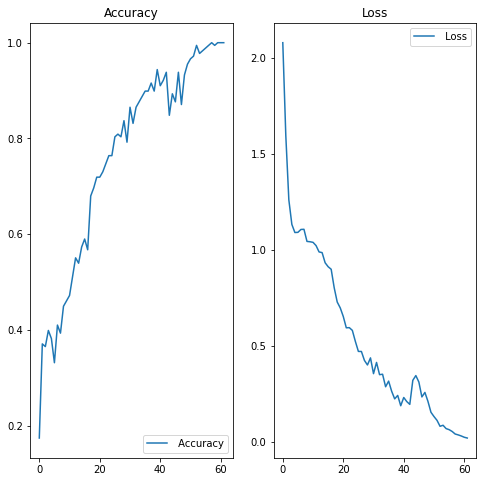

In [167]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

0


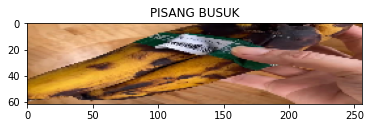

0


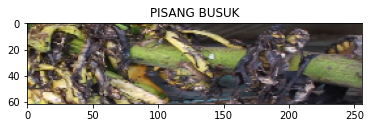

1


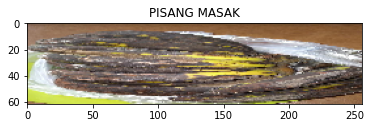

0


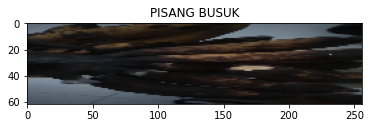

0


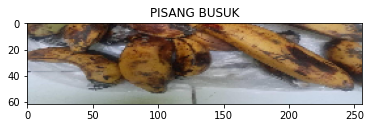

0


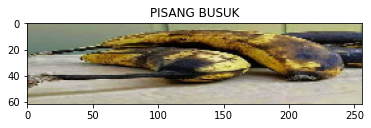

0


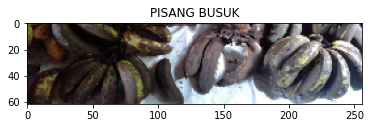

0


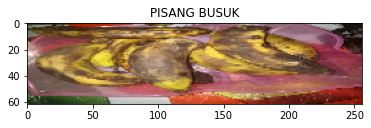

2


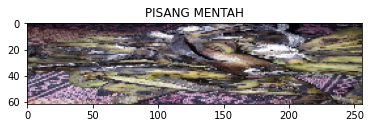

1


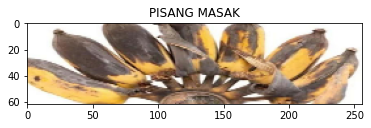

In [168]:
testes = '../input/image-classification-pisang/IMAGE CLASSIFICATION PISANG/TEST/PISANG BUSUK'
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = os.listdir(testes)
path = []
for fn in uploaded:
  path.append(fn)

for obj in path:
  patoh = os.path.join(testes,obj)
  img = image.load_img(patoh, target_size=input_shape)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=BATCH_SIZE)
  class_index = np.argmax(classes)
  class_indeks = int(class_index)
  pred = class_names[class_indeks]
  print(class_indeks)
  plt.imshow(img)
  plt.title(pred)
  plt.show()

1


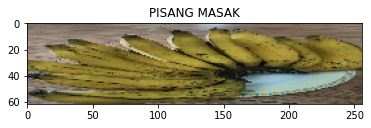

1


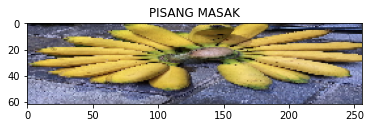

1


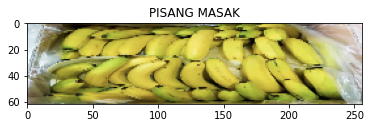

0


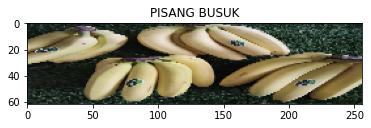

1


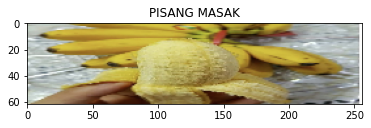

1


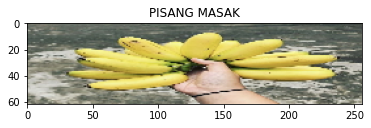

1


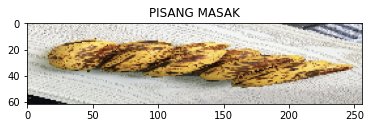

1


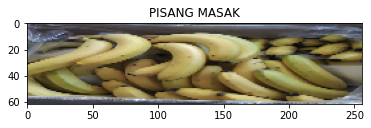

1


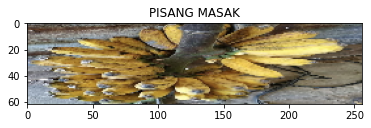

1


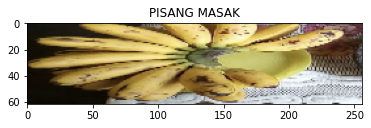

In [169]:
testes = '../input/image-classification-pisang/IMAGE CLASSIFICATION PISANG/TEST/PISANG MASAK'
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = os.listdir(testes)
path = []
for fn in uploaded:
  path.append(fn)

for obj in path:
  patoh = os.path.join(testes,obj)
  img = image.load_img(patoh, target_size=input_shape)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=BATCH_SIZE)
  class_index = np.argmax(classes)
  class_indeks = int(class_index)
  pred = class_names[class_indeks]
  print(class_indeks)
  plt.imshow(img)
  plt.title(pred)
  plt.show()

2


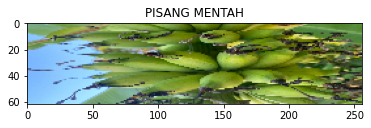

2


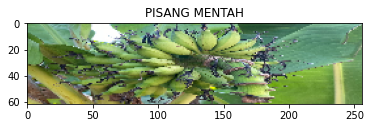

2


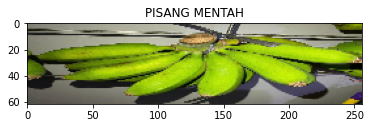

2


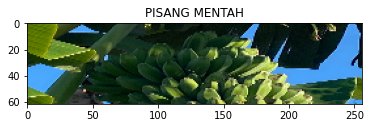

2


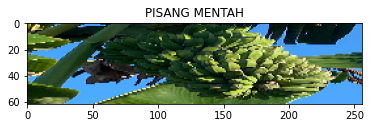

2


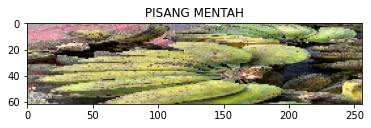

2


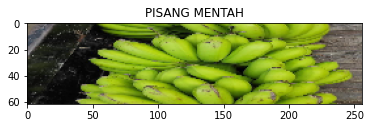

2


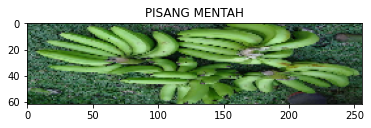

2


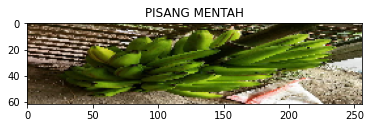

2


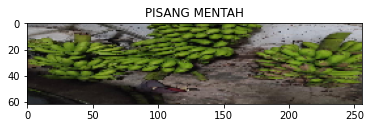

In [170]:
testes = '../input/image-classification-pisang/IMAGE CLASSIFICATION PISANG/TEST/PISANG MENTAH'
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = os.listdir(testes)
path = []
for fn in uploaded:
  path.append(fn)

for obj in path:
  patoh = os.path.join(testes,obj)
  img = image.load_img(patoh, target_size=input_shape)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=BATCH_SIZE)
  class_index = np.argmax(classes)
  class_indeks = int(class_index)
  pred = class_names[class_indeks]
  print(class_indeks)
  plt.imshow(img)
  plt.title(pred)
  plt.show()

In [171]:
model.save("Klasifikasi Tingkat Kematangan Pisang.h5")